POSITION IN THE NIGHT SKY

In [134]:
import pandas as pd 
df=pd.read_csv('Pleiades_Cluster.csv')
df.head()

,gmag,ra,dec,plx,bp_rp,lum_val,teff_val,radius_val
0,15.684173,58.452096,23.485778,3.486630,2.192428,0.062333,3797.0000,0.576938
1,7.498167,55.930096,25.080502,8.027063,0.188913,NaN,8337.3330,NaN
2,16.102013,57.170842,23.237979,8.509836,3.116683,NaN,3838.1667,NaN
3,12.923352,56.999005,24.731093,6.493298,1.591153,0.156267,4456.1650,0.663230
4,16.454210,55.865759,24.270604,2.675075,2.346289,0.050944,3830.0100,0.512623


In [135]:
gmax=df['gmag'].max()
print(gmax)


19.885986


In [156]:
gmax=df['gmag'].max()
df['brightness']=gmax-df['gmag']
df.head()

,gmag,ra,dec,plx,bp_rp,lum_val,teff_val,radius_val,abs_mag,brightness
0,15.684173,58.452096,23.485778,3.486630,2.192428,0.062333,3797.0000,0.576938,-7.609925,4.201813
1,7.498167,55.930096,25.080502,8.027063,0.188913,NaN,8337.3330,NaN,-11.626516,12.387819
2,16.102013,57.170842,23.237979,8.509836,3.116683,NaN,3838.1667,NaN,-2.730650,3.783973
3,12.923352,56.999005,24.731093,6.493298,1.591153,0.156267,4456.1650,0.663230,-7.261571,6.962634
4,16.454210,55.865759,24.270604,2.675075,2.346289,0.050944,3830.0100,0.512623,-8.164680,3.431776


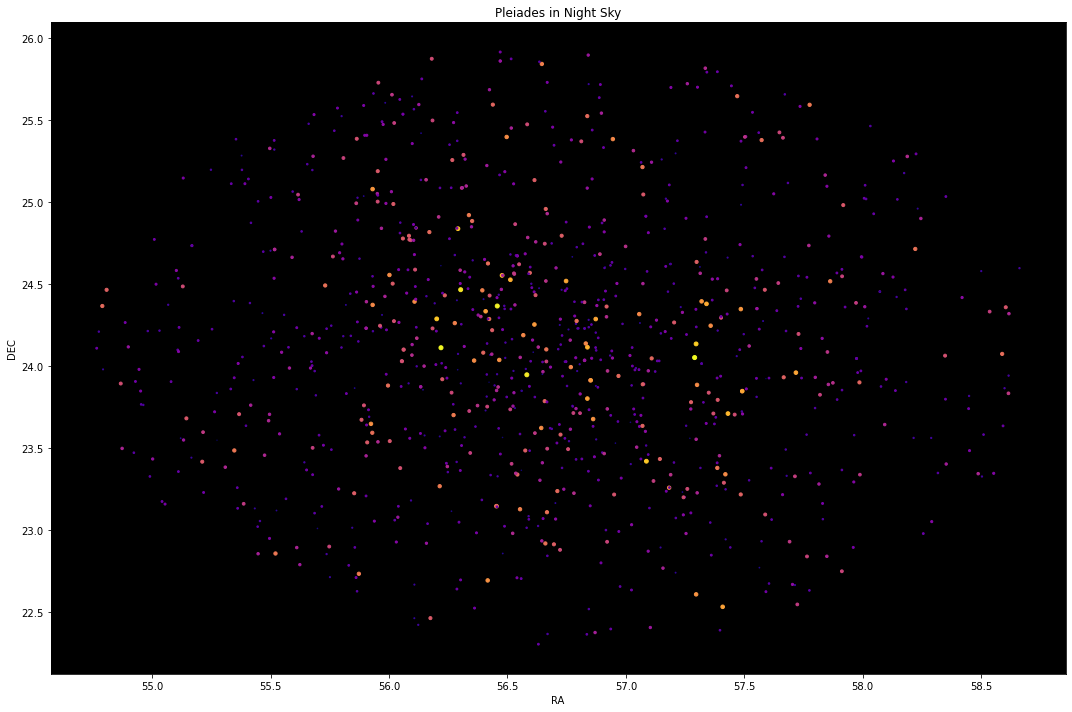

In [161]:
ra=df['ra']
dec=df['dec']
bri=df['brightness']
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,10))
plt.scatter(ra,dec,s=bri,c=bri,cmap='plasma')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('Pleiades in Night Sky')
plt.gca().set_facecolor('k')
plt.tight_layout()
plt.show()



ABSOLUTE DISTANCE AND MAGNITUDE

In [138]:
import pandas as pd
df=pd.read_csv('Pleiades_Cluster.csv')
df

,gmag,ra,dec,plx,bp_rp,lum_val,teff_val,radius_val
0,15.684173,58.452096,23.485778,3.486630,2.192428,0.062333,3797.0000,0.576938
1,7.498167,55.930096,25.080502,8.027063,0.188913,NaN,8337.3330,NaN
2,16.102013,57.170842,23.237979,8.509836,3.116683,NaN,3838.1667,NaN
3,12.923352,56.999005,24.731093,6.493298,1.591153,0.156267,4456.1650,0.663230
4,16.454210,55.865759,24.270604,2.675075,2.346289,0.050944,3830.0100,0.512623
...,...,...,...,...,...,...,...,...
982,11.852763,56.920869,22.929795,5.779793,1.404244,0.513834,4526.7550,1.165440
983,8.186488,55.930264,24.374396,7.226433,0.352915,7.839014,7963.1953,1.470986
984,15.502478,56.525937,25.112616,2.085063,1.515169,0.141687,4443.0000,0.635280
985,17.422070,57.441505,22.895388,1.730391,2.049238,NaN,NaN,NaN


In [139]:
import math 
import numpy as np 
M=[]
a=np.array(df)
gmag=a[:,0]
plx=a[:,3]
distance=[]
for i in range(len(gmag)):
    l=(gmag[i]-5*math.log(1000/plx[i])+5)
    M.append(l)
df['abs_mag']=M

In [140]:
distance=[]
for i in range(len(gmag)):
    d=(1000/plx[i])*3.26156
    distance.append(d)


In [143]:

for j in range(len(distance)):
    if(distance[j]>500):
        del(distance[j])


C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


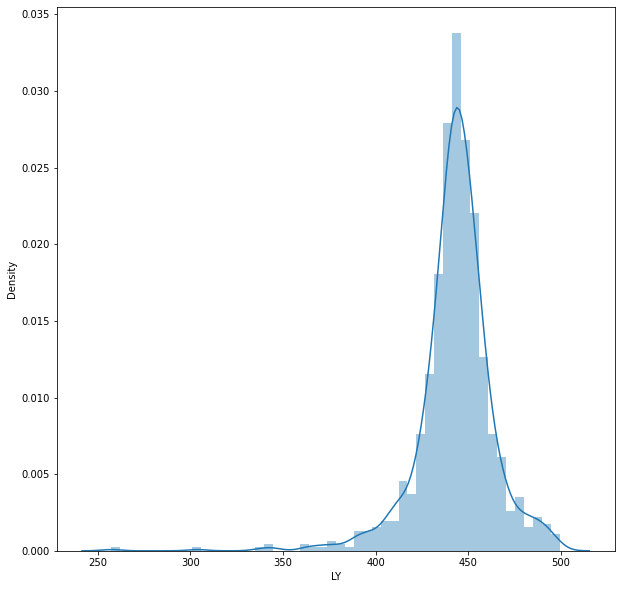

In [144]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(10,10))
sns.distplot(distance,hist=True)
plt.xlabel("LY")
plt.ylabel("Density")
plt.show()


In [145]:
import statistics
x=statistics.mean(distance)
print("the mean distance of cluster is:",x)

the mean distance of cluster is: 443.0941467328077


HERTZPRUNG-RUSSELL DIAGRAM 

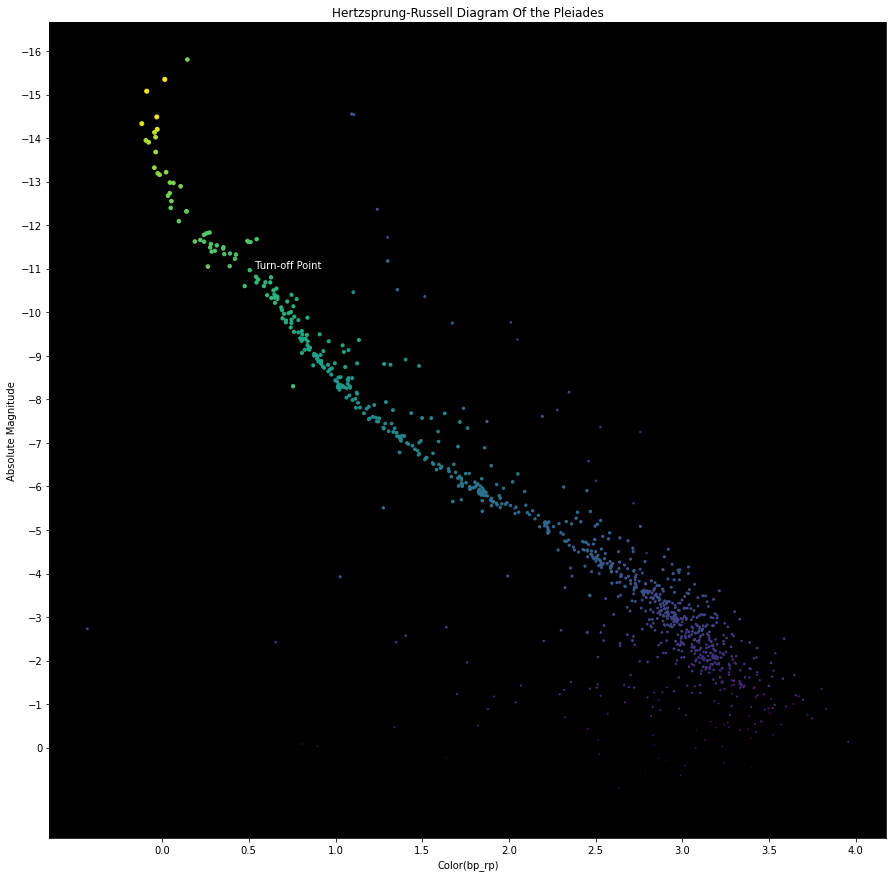

In [165]:
bp_rp=df['bp_rp']
x=[0,0.5,1,1.5,2,2.5,3,3.5,4]
y=[0,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12,-13,-14,-15,-16]
abs_mag=df['abs_mag']
plt.figure(figsize=(15,15))
plt.scatter(bp_rp,abs_mag,s=bri,c=bri,cmap='viridis')
plt.xticks(x)
plt.yticks(y)
plt.text(0.5,-11,'  Turn-off Point ',c='w')
plt.gca().set_facecolor('k')
plt.gca().invert_yaxis()
plt.xlabel("Color(bp_rp)")
plt.ylabel("Absolute Magnitude")
plt.title("Hertzsprung-Russell Diagram Of the Pleiades")
plt.show()




Luminosity and Temperature

In [150]:
df1=df.assign(L_value=10**((4.77-(df['gmag']-5*np.log10(100/df['plx'])))/2.5))
df1=df1.dropna()
df1=df1.assign(temp=5601/((df['bp_rp']+0.4)**(2/3)))
df1=df1.assign(radius=np.sqrt(df1['L_value'])/(df1['temp']/5800)**2)
df1

,gmag,ra,dec,plx,bp_rp,lum_val,teff_val,radius_val,abs_mag,L_value,temp,radius
0,15.684173,58.452096,23.485778,3.486630,2.192428,0.062333,3797.0000,0.576938,-7.609925,0.035442,2967.981218,0.718941
3,12.923352,56.999005,24.731093,6.493298,1.591153,0.156267,4456.1650,0.663230,-7.261571,0.129936,3538.852567,0.968267
4,16.454210,55.865759,24.270604,2.675075,2.346289,0.050944,3830.0100,0.512623,-8.164680,0.029624,2856.065168,0.709810
7,12.179868,55.676693,23.502644,8.294176,1.369455,0.165852,4861.0350,0.574189,-6.781140,0.157945,3828.592774,0.912075
10,14.584626,55.786541,23.251838,4.447532,1.873214,0.085902,4112.1074,0.577466,-7.492404,0.059967,3239.704383,0.784876
...,...,...,...,...,...,...,...,...,...,...,...,...
979,9.779877,56.710653,23.239006,6.497724,0.746530,2.140879,5945.6665,1.378947,-10.401640,2.347073,5112.995279,1.971372
982,11.852763,56.920869,22.929795,5.779793,1.404244,0.513834,4526.7550,1.165440,-8.914174,0.439613,3779.218443,1.561662
983,8.186488,55.930264,24.374396,7.226433,0.352915,7.839014,7963.1953,1.470986,-11.463561,8.232975,6767.605218,2.107484
984,15.502478,56.525937,25.112616,2.085063,1.515169,0.141687,4443.0000,0.635280,-10.362302,0.117158,3631.846532,0.872944


TEMPERATURE


In [151]:
df1.to_csv("Pleiades_Cluster2.csv", index=None)

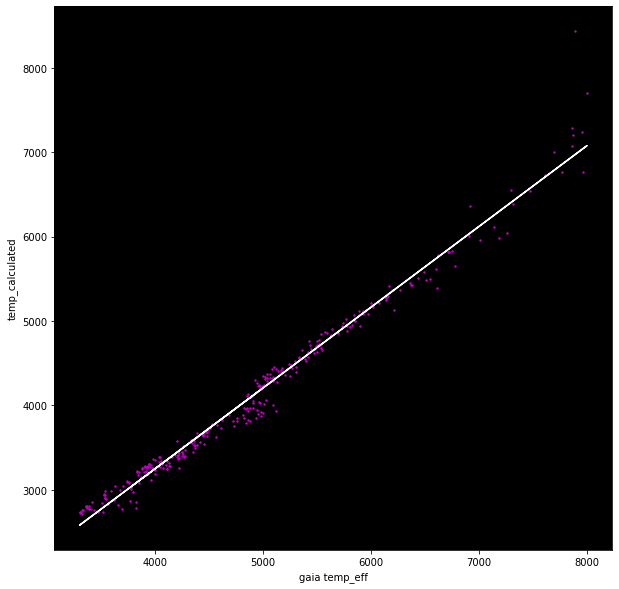

In [173]:
from scipy.optimize import curve_fit as cf
import matplotlib.pyplot as plt
#x is the independent variable, m & c are the parameters to be determined
def f(x,m,c):
    return m*x+c        
teff=df1['teff_val']
temp=df1['temp']
plt.figure(figsize=(10,10))
plt.scatter(teff,temp,s=2,c='m')
p_opt, p_cov = cf(f,teff,temp)
plt.plot(teff,f(teff,*p_opt),'w',label='Best Fit')
plt.xlabel("gaia temp_eff")
plt.ylabel("temp_calculated")
plt.gca().set_facecolor('k')


LUMINOSITY


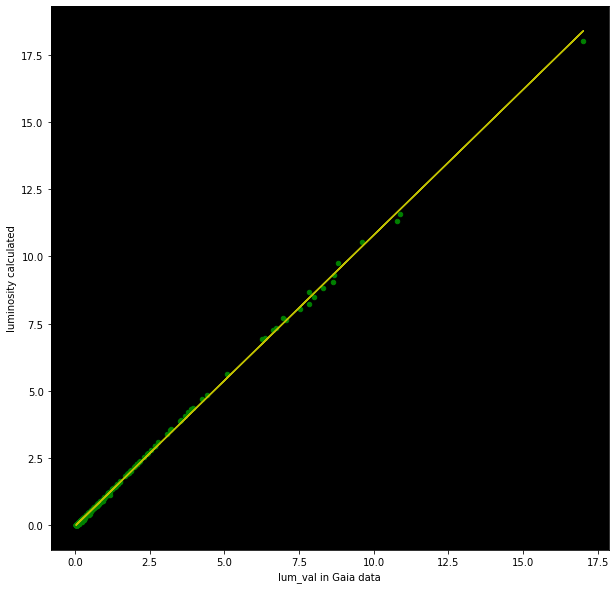

In [170]:
plt.figure(figsize=(10,10))
plt.scatter(df1['lum_val'],df1['L_value'],s=20,c='g')
p_opt, p_cov = cf(f,df1['lum_val'],df1['L_value'])
plt.plot(df1['lum_val'],f(df1['lum_val'],*p_opt),'y',label='Best Fit')
plt.xlabel('lum_val in Gaia data')
plt.ylabel("luminosity calculated")
plt.gca().set_facecolor('k')


RADIUS

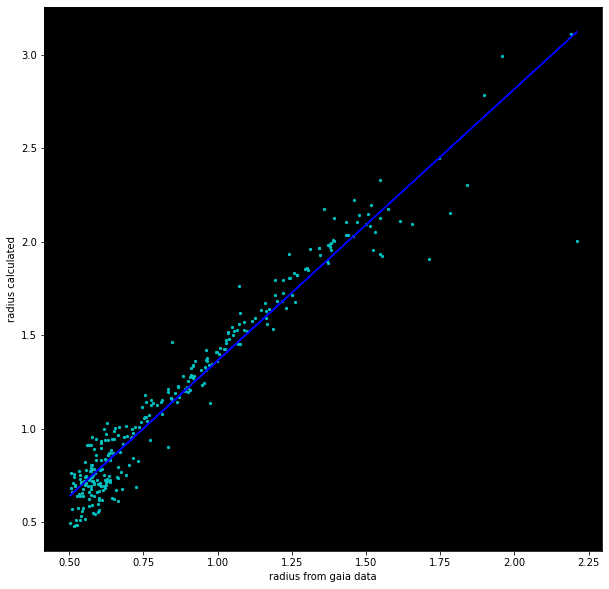

In [171]:
plt.figure(figsize=(10,10))
plt.scatter(df1['radius_val'],df1['radius'],s=5,c='c')
p_opt,p_cov = cf(f,df1['radius_val'],df1['radius'])
plt.plot(df1['radius_val'],f(df1['radius_val'],*p_opt),'b',label='Best Fit')
plt.xlabel("radius from gaia data")
plt.ylabel('radius calculated')
plt.gca().set_facecolor('k')